### Name: Saeed Shaban

<br>
<br> <center> <font size="12" color=Brown>Udemy Courses Analysis</font> </center> <br/>
<br> <center> <font size="10" color=Brown>A CRISP-DM Approach</font> </center> <br/>

## Overview
This data for site udemy.com, this is most popular website for online courses 
we will get more benefits from this data for example 

- what are the most popular courses?
- which are the top rated courses?
- which courses have high prices?
- which courses have lower prices?


- Can we Predict the Price of Udemy Course based on given features
- Can we predict whether the Courses are paid or not by given features


and more information used by data science.

- for download this data you can visit the source from kaggle.com 

- https://www.kaggle.com/andrewmvd/udemy-courses

To work on this project, we will use the (CRISP - DM) Rules in data science.
(Cross-industry standard process for data mining)

## The CRISP - DM including these steps.

- I. Business Understanding
- II. Data Understanding
- III. Data Preparation
- IV. Modeling
- V. Evaluation
- VI. Deployment



<br> <center> <font size="8" color=Brown>Business Understanding</font> </center> <br/>

## Project Objectives

### The Project is related to Udemy Courses. The objective of this project is to understand the natures of the Udemy courses dataset mathematically mainly to see that which kind of courses would like to be taken more and which one to be less. Also, the goal is to make an automated script that can tune and fit the algorithm itself to predict the price for new courses. Both Udemy company and customers can get benefit from this project

## Requirements

### The Project Implementation needs a large amount of data so that the model can be trained accordingly. The data for both high prices and low prices courses should be balanced.


## Constraints

### Since, this is a real time-issue with a versatile number of courses from different groups so the model fitting may be bit odd and accuracy may get worse in some cases of outliers. The best case will be one that covers maximum outliers while considering the original trend.

## Business Need

### Udemy is earning through its customers. Customers are taking advantage from Udemy by learning courses that can help them for lifetime. So, this issue of a balanced way of customer satisfaction along with affordable budget ranges need to be checked by the Udemy team. Data Scientists can analyze this for them.



## Purpose of Project

### The main purpose of this project is to a built a model based on courses data to predict that which kind of courses are more likely to have lower prices. The best model that will predict the price of the courses accurately will be automated to generate final predictions.


## Why Automation is needed

### With the Increase in large number of courses, it is difficult to manage all the data with hands and careful considerations needed to be taken if that is to be done. So, an automated script that can predict the prices of the Udemy courses and company can learn customer behaviors through this project.


# Importing Libraries

In [1]:
import sys
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest,f_classif

<br> <center> <font size="8" color=Brown>Data Understanding</font> </center> <br/>

# Data from URL

In [2]:
url1='https://raw.githubusercontent.com/apomohab/Capstone_project_Data_Science/main/udemy_courses.csv'
df = pd.read_csv(url1)
df.head(5)

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792          923           274          All Levels   
2             2174           74            51  Intermediate Level   
3             2451           11            36          All Levels   
4             1276           45            26  Intermediate Level   

   content_duration   published_timestamp           subject  
0               1.5  2017-01-18T20:58:58Z  Business Finance  
1              39.0  2017-03-09T16:34:20Z  Business Finance  
2               2.5  2016-12-19T19:26:30Z  Business Finance  
3               3.0  2017-05-30T20:07:24Z  Business Finance  
4               2.0  2016-12-13T14:57:18Z  Business Finance

# Columnns in dataframe

In [3]:
print(df.columns.values)

['course_id' 'course_title' 'url' 'is_paid' 'price' 'num_subscribers'
 'num_reviews' 'num_lectures' 'level' 'content_duration'
 'published_timestamp' 'subject']


# Shape of the dataframe

In [4]:
df.shape

(3678, 12)

# Information of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


# A description of the data

In [6]:
df.describe()

course_id        price  num_subscribers   num_reviews  num_lectures  \
count  3.678000e+03  3678.000000      3678.000000   3678.000000   3678.000000   
mean   6.759720e+05    66.049483      3197.150625    156.259108     40.108755   
std    3.432732e+05    61.005755      9504.117010    935.452044     50.383346   
min    8.324000e+03     0.000000         0.000000      0.000000      0.000000   
25%    4.076925e+05    20.000000       111.000000      4.000000     15.000000   
50%    6.879170e+05    45.000000       911.500000     18.000000     25.000000   
75%    9.613555e+05    95.000000      2546.000000     67.000000     45.750000   
max    1.282064e+06   200.000000    268923.000000  27445.000000    779.000000   

       content_duration  
count       3678.000000  
mean           4.094517  
std            6.053840  
min            0.000000  
25%            1.000000  
50%            2.000000  
75%            4.500000  
max           78.500000

# Checking Null Values in the dataset

In [7]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

## There is no Null Value in the dataset. So we can procees our analysis

<br> <center> <font size="8" color=Brown>Exploratory Data Analysis</font> </center> <br/>

# Corelation and Heatmaps

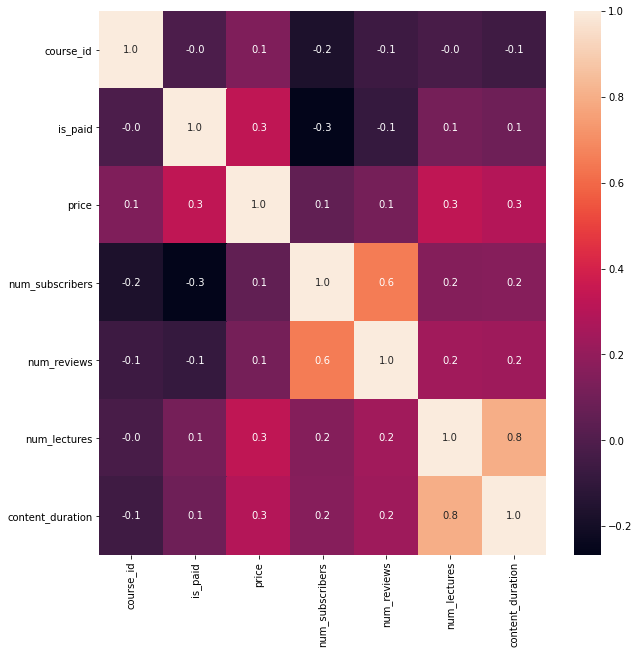

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot=True, fmt='.1f')
plt.show()

## The above Image shows that prices have higher rlations with lectures and Content Duration
## Similarly Paid or Free courses also depends upon content and lectures

# The Plot for the Maximum Price of Courses

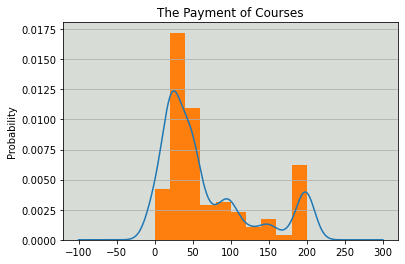

In [9]:
fig, ax = plt.subplots()
df.price.plot.kde(ax=ax, legend=False, title='The Payment of Courses')
df.price.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

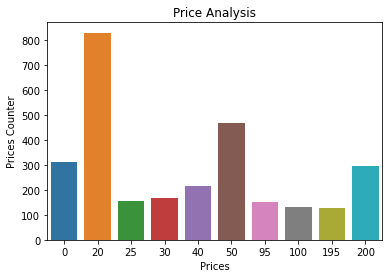

In [10]:
sns.barplot(x= df.price.value_counts()[:10].index , y=df.price.value_counts()[:10].values)
plt.xlabel('Prices')
plt.ylabel("Prices Counter")
plt.title("Price Analysis")
plt.show()

## The above two graphs shows that Most of the Courses have Payment of 20USD to 50USD. While Almost 450 Courses have price of 195 and 200USD 

# The Most Paid Subjects

subject
Business Finance       68.552301
Graphic Design         57.827529
Musical Instruments    49.558824
Web Development        77.033333
Name: price, dtype: float64


<AxesSubplot:ylabel='price'>

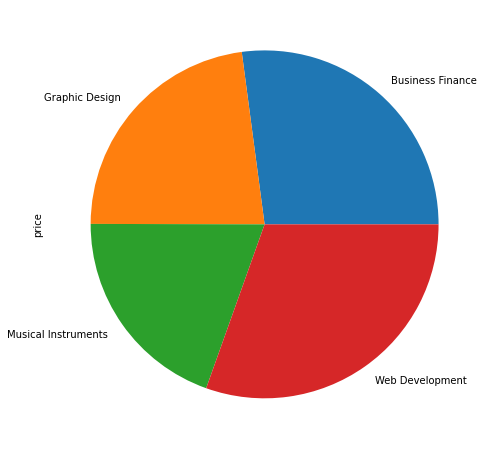

In [11]:
print(df.groupby(['subject']).price.mean())
plt.figure(figsize=(8,8))
df.groupby(['subject']).price.mean().plot.pie()

<AxesSubplot:xlabel='subject'>

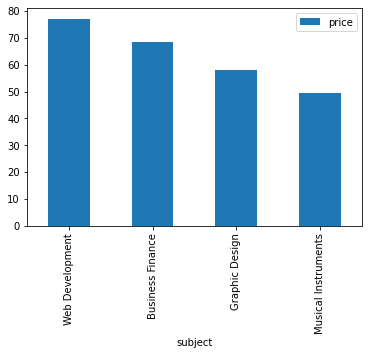

In [12]:
show = df[['subject','price']].groupby('subject').mean().sort_values(by='price', ascending=False)
show.plot.bar()    

## Web Development has maximam fee

# Most Courses belongs to which Subject?

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64


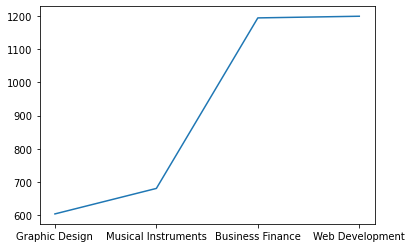

In [13]:
print(df['subject'].value_counts())
Save=(pd.DataFrame(df['subject'].value_counts()).sort_values("subject")).reset_index()
Save.columns=['Subject','Number of Courses']
plt.plot(Save['Subject'],Save['Number of Courses'])

## Web Development has highest Number of Courses 

# Distribution of Data

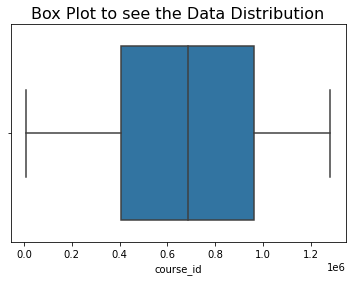

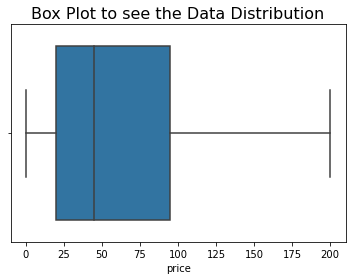

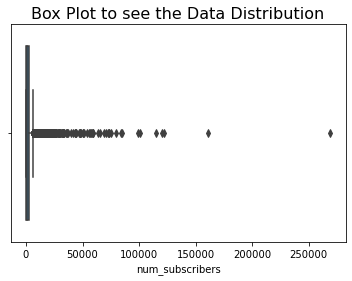

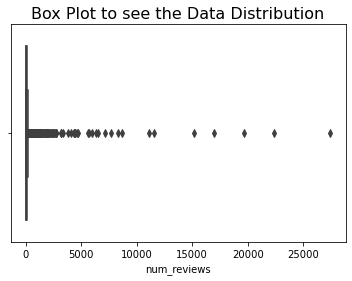

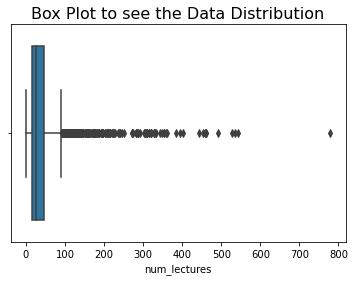

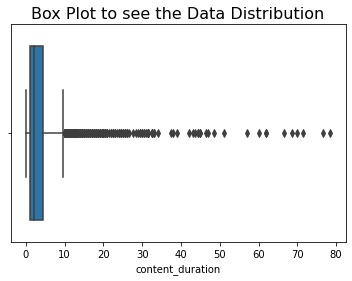

In [14]:
test = df[df.describe().columns]
i = 0
while i <len(test.columns):
    plt.figure()
    sns.boxplot(x=test[test.columns[i]])
    plt.title("Box Plot to see the Data Distribution",fontsize=16)
    plt.show()
    i = i+1

# The plots above are showing the distributions of each plots one by one. It can be seen that Subcribers, reviews , lectures and durations have highest values and even 3rd Quartile in mimum ranges

# The Number of Lectures and Avergae Prices

<AxesSubplot:xlabel='price', ylabel='num_lectures'>

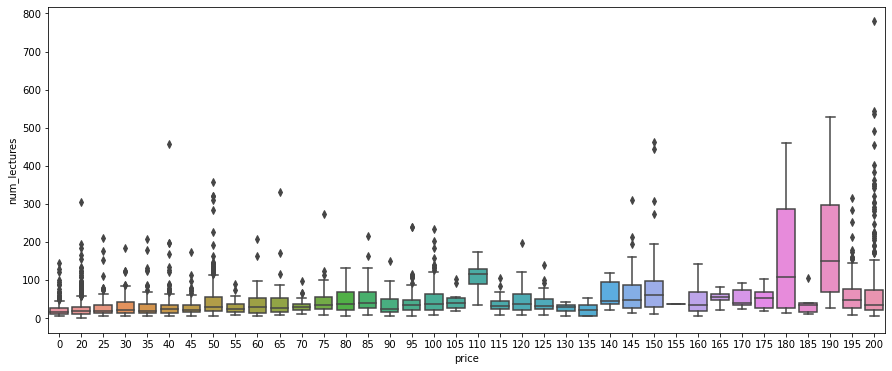

In [15]:
plt.subplots(figsize=(15,6))
sns.boxplot(x='price', y='num_lectures', data=df)

# The above figure shows that the Prices for higher number of lectures are getting highers

<AxesSubplot:xlabel='price', ylabel='num_reviews'>

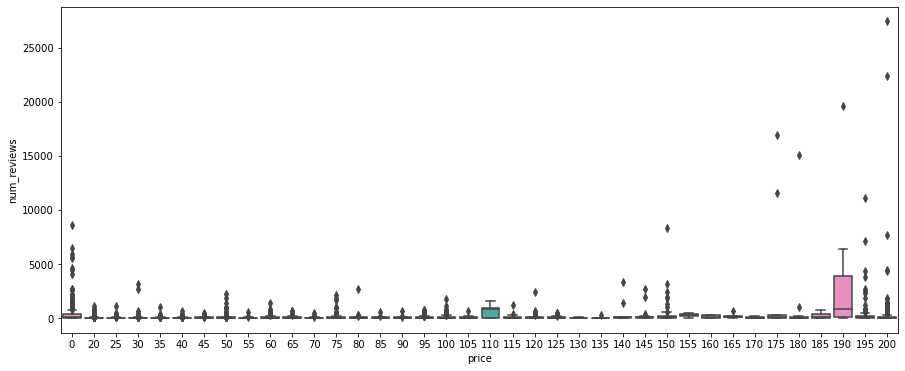

In [16]:
plt.subplots(figsize=(15,6))
sns.boxplot(x='price', y='num_reviews', data=df)

# The above figure shows that Reviews do not effect prices much

# Paid vs Number of Lectures

<AxesSubplot:xlabel='is_paid', ylabel='num_lectures'>

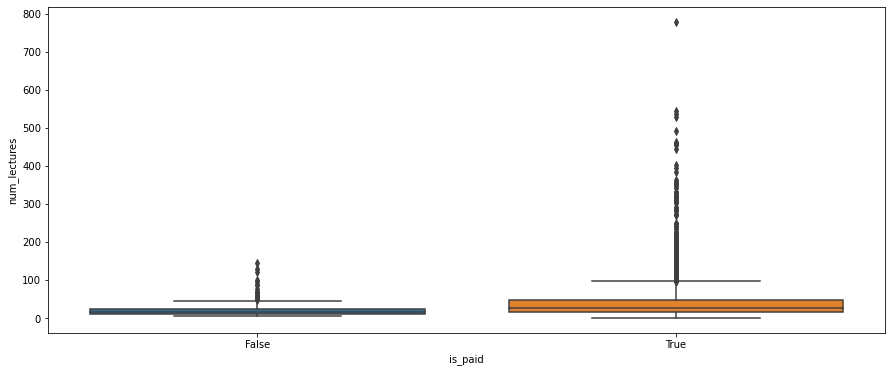

In [17]:
plt.subplots(figsize=(15,6))
sns.boxplot(x='is_paid', y='num_lectures', data=df)

# The above figure shows that Paid Courses have higher Number of Lectures

# Subscribers vs Paid

<AxesSubplot:xlabel='is_paid', ylabel='num_subscribers'>

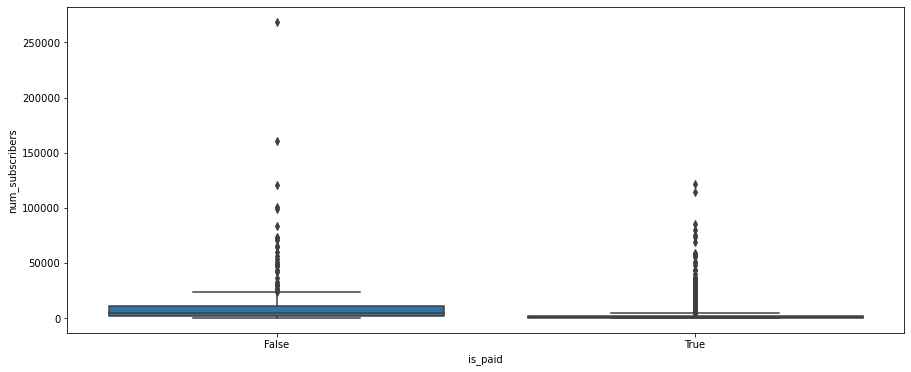

In [18]:
plt.subplots(figsize=(15,6))
sns.boxplot(x='is_paid', y='num_subscribers', data=df)

# The above figure shows that Unpaid Courses have more subscribers

# A view of Number of Lectures

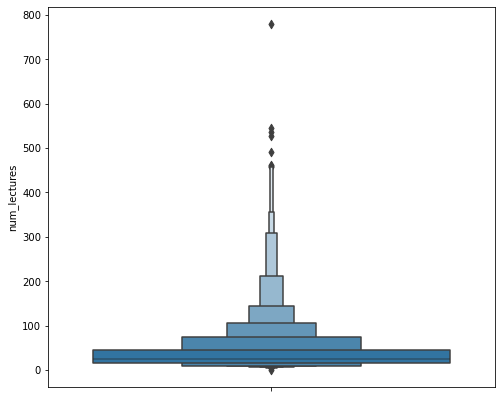

In [19]:
plt.figure(figsize=(8,7))
sns.boxenplot(y=df["num_lectures"])
plt.show()

## The above figure shows Most the Courses have low number of lectures. There are very less number of lectures at higher peaks

# Lectures vs Reviews

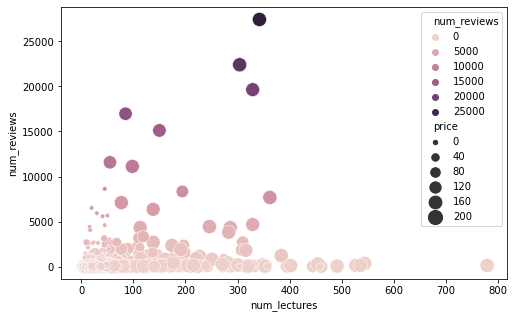

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='num_lectures',y='num_reviews',hue='num_reviews',size='price',sizes=(20,200),data=df)
plt.show()

## The above figures shows that most of the customers have rated the lectures with lower number

## Reviews vs Subscriptions

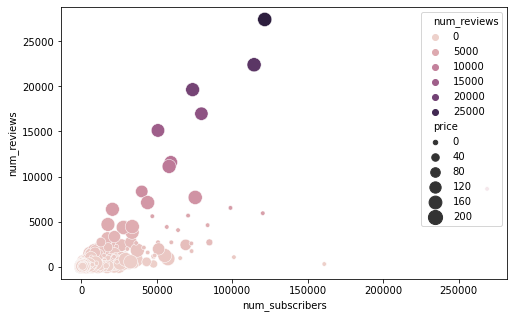

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='num_subscribers',y='num_reviews',hue='num_reviews',size='price',sizes=(20,200),data=df)
plt.show()

## The above figure shows that Reviews are directly proptional to subscribers

### Next, we will answer some interesting questions

- what are the level students taking the course Introduction to Web Development?
- which are the lectures having more courses?
- what are the top subscribed courses published in year 2017?
- show all student level used by bar chart.
- what are the most popular courses
- which are the top-rated courses
- which courses have high prices
- which courses have lower prices


# What are the level students taking the course Introduction to Web Development?

In [22]:
def level_students():
    
    """
    for answer this question we need to explore the columns  
    [course_title] and [level].
    
    """
    
    #count all types in the varibles course_title
    #print(" The All Count course_title  \n \n" + str(df['course_title'].value_counts()) + "\n\n")
    
    #count all types in the varibles Country
    print(" The All Count level  \n \n " + str(df['level'].value_counts())  + "\n\n")
    
    #selected the data we need to get only based on the question .
    interrmediate_Courses = df.loc[(df['course_title'] == 'Introduction to Web Development') & (df['level'])]
    
    #Display The Answer
    print(" The level for students take course Introduction to Web Development" + str(len(interrmediate_Courses)))
    
    #Display the data frame .
    return interrmediate_Courses.head(3)
    
    

level_students() 


 The All Count level  
 
 All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64


 The level for students take course Introduction to Web Development2


course_id                     course_title  \
2607     178640  Introduction to Web Development   
2660      99986  Introduction to Web Development   

                                                    url  is_paid  price  \
2607  https://www.udemy.com/introduction-to-web-deve...     True     50   
2660  https://www.udemy.com/introduction-to-web-deve...     True     20   

      num_subscribers  num_reviews  num_lectures           level  \
2607             5921           35            42  Beginner Level   
2660            18143          159            15  Beginner Level   

      content_duration   published_timestamp          subject  
2607               4.5  2014-03-11T19:43:30Z  Web Development  
2660               2.0  2013-10-04T13:40:59Z  Web Development

## Most of the Begineer Level Students have taken the Introduction to Web Development course

# which are the lectures having more courses?

<AxesSubplot:ylabel='course_title'>

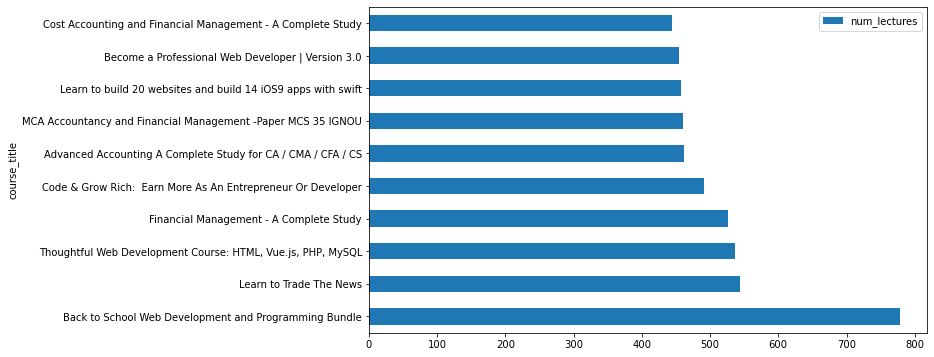

In [23]:
See=pd.DataFrame(df.groupby(['course_title'])['num_lectures'].mean()).sort_values("num_lectures",ascending=False).head(10)
See.plot.barh(figsize=(10, 6))    

# The top-most courses titles are shown above

# what are the top subscribed courses published in year 2017?

<AxesSubplot:ylabel='course_title'>

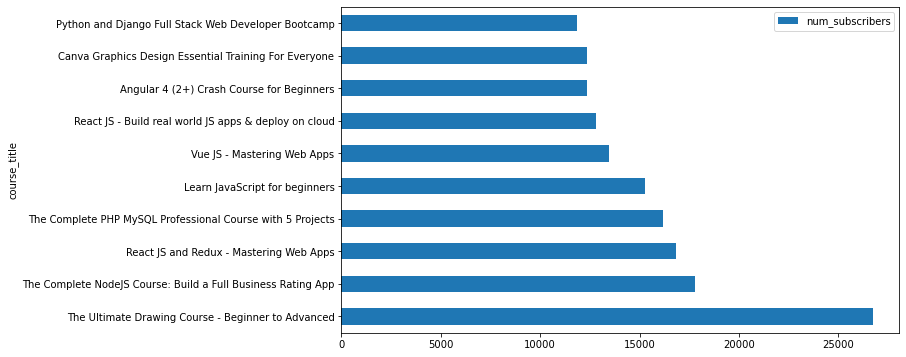

In [24]:
top=df[pd.to_datetime(df['published_timestamp']).dt.year==2017]
top=top.sort_values("num_subscribers",ascending=False).head(10)
top=top[['course_title','num_subscribers']]
top.index=top['course_title']
top.plot.barh(figsize=(10, 6))    

# the above figure shows the top-10 most subscribed courses that were published in 2017

# Student Level Distribution

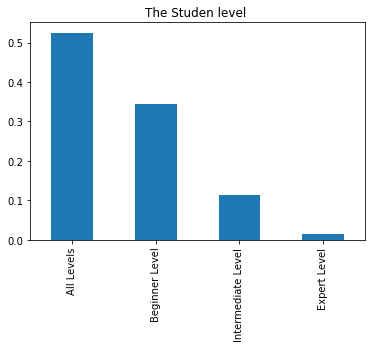

In [25]:
def sttudent_Levels():
    
    """
    in this question need to provide the student levels 
    used by bar chart .
    """
    
    
    #count the programhobby varible and make bar chart 
    status_vals = df['level'].value_counts()
    
    #devision thee counts at the shape then make bar chart
    (status_vals/df.shape[0]).plot(kind="bar");
    
    #assign the title 
    plt.title("The Studen level ");


#called function
sttudent_Levels()
    


# Most of the courses belongs to all types and Beginner levels

# What are the most popular courses

<AxesSubplot:ylabel='course_title'>

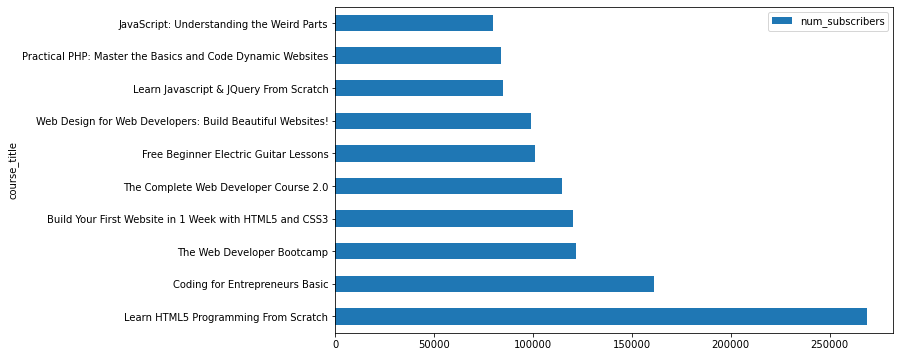

In [26]:
top=df.sort_values("num_subscribers",ascending=False).head(10)
top=top[['course_title','num_subscribers']]
top.index=top['course_title']
top.plot.barh(figsize=(10, 6))    

# The above Figure shows the Most Subscribed Course throughout history of Udemy

# which are the top-rated courses

<AxesSubplot:ylabel='course_title'>

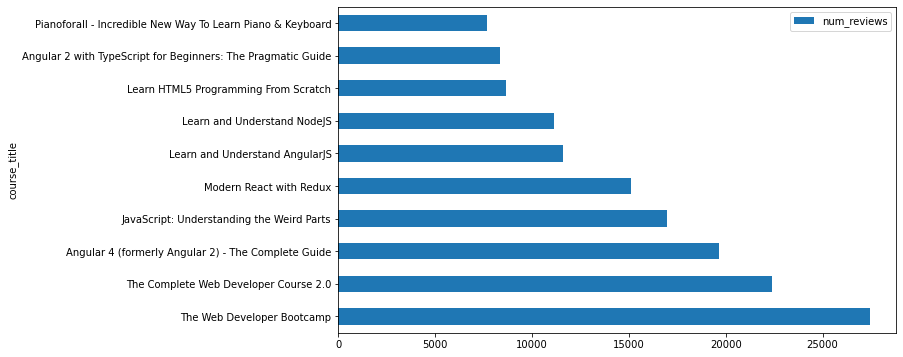

In [27]:
top=df.sort_values("num_reviews",ascending=False).head(10)
top=top[['course_title','num_reviews']]
top.index=top['course_title']
top.plot.barh(figsize=(10, 6))    

# The above plot shows most rated courses on udemy

# The courses with the Higher Prices and High Subscribers

<AxesSubplot:ylabel='course_title'>

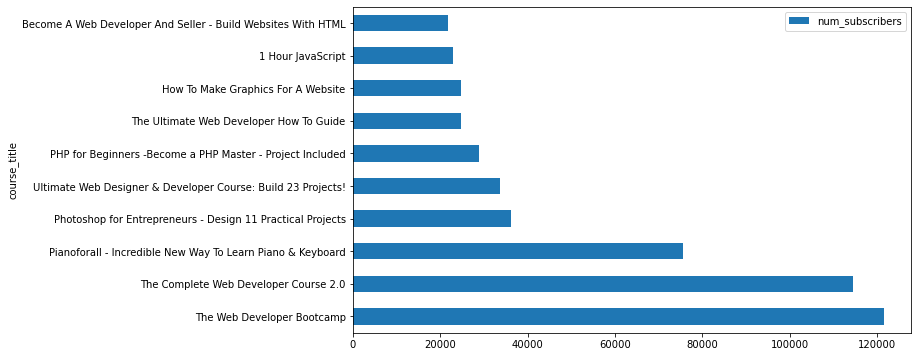

In [28]:
top=df[df["price"]==df['price'].max()]
top=top.sort_values("num_subscribers",ascending=False).head(10)
top=top[['course_title','num_subscribers']]
top.index=top['course_title']
top.plot.barh(figsize=(10, 6))    

# The most subsribed courses even with higher prices are shows above

# The Free Courses with Highest Subscribes

<AxesSubplot:ylabel='course_title'>

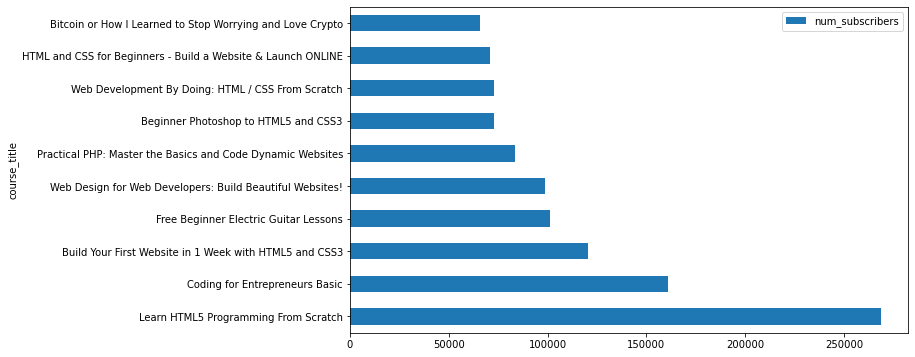

In [29]:
top=df[df["price"]==df['price'].min()]
top=top.sort_values("num_subscribers",ascending=False).head(10)
top=top[['course_title','num_subscribers']]
top.index=top['course_title']
top.plot.barh(figsize=(10, 6))    

<br> <center> <font size="8" color=Brown>Data Prepartion</font> </center> <br/>

# step 3  : Prepare Data  

 in this step we will working around data and make cleaning data 
  and need to know some info same 
  
 - **what is percent missing values in the varibles**
 - **what is varibles have more missing values** 
 - **what is frequent values in the varibles**
 - **what is the best decesion for missing values**
 - **Assign the predicts varibles and Response varibles**


In [30]:
def Perecnt_Missing():
    
    '''
    we need to get the percent missing values 
    in all columns for see what is varibles 
    have more missing values.
    
    Missing Values :
    
    the first step in preparing data the "Missing Values" 
    In statistics, missing data, or missing values,
    occur when no data value is stored for the variable
    in an observation Missing data are a common occurrence and 
    can have a significant effect on the conclusions
    that can be drawn from the data.
    '''
    
    #select the missing values and get sum then 
    #multiplication * 100 then division at the len dataframe 
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'Column_name': df.columns,
                                 'percent_missing': percent_missing})
    
    #Display from 0 to 20 columns
    return missing_value_df[0:20]


#called function
Perecnt_Missing()

Column_name  percent_missing
course_id                      course_id              0.0
course_title                course_title              0.0
url                                  url              0.0
is_paid                          is_paid              0.0
price                              price              0.0
num_subscribers          num_subscribers              0.0
num_reviews                  num_reviews              0.0
num_lectures                num_lectures              0.0
level                              level              0.0
content_duration        content_duration              0.0
published_timestamp  published_timestamp              0.0
subject                          subject              0.0

# Since there is no missing values so we will move towards last step

# Prepare data for modeling ..

- Chose the predicts varibles inside list and check the missing values in this varibles
- Assign the predict varible
- Assign the responnse varible

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
enc  = LabelEncoder()
enc.fit(df['subject'])
#print('classed found : ' , list(enc.classes_))
#print('classed found : ' , list(enc.classes_))

print('equivilant numbers are : ' ,enc.transform(df['subject']) )

df['subject'] = enc.transform(df['subject'])
#print('Updates dataframe is : \n' ,df )

equivilant numbers are :  [0 0 0 ... 3 3 3]


In [33]:
enc  = LabelEncoder()
enc.fit(df['level'])
#print('classed found : ' , list(enc.classes_))
#print('classed found : ' , list(enc.classes_))

print('equivilant numbers are : ' ,enc.transform(df['level']) )

df['level'] = enc.transform(df['level'])
#print('Updates dataframe is : \n' ,df )

equivilant numbers are :  [0 0 3 ... 0 0 1]


In [34]:
enc  = LabelEncoder()
enc.fit(df['is_paid'])
#print('classed found : ' , list(enc.classes_))
#print('classed found : ' , list(enc.classes_))

print('equivilant numbers are : ' ,enc.transform(df['is_paid']) )

df['is_paid'] = enc.transform(df['is_paid'])
#print('Updates dataframe is : \n' ,df )

equivilant numbers are :  [1 1 1 ... 1 1 1]


# Features selctions
# Selection of logical Input and Output Variables

In [35]:
X=df[['num_subscribers','num_reviews','num_lectures','content_duration','subject']]
y=df['price']
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
score_df = pd.DataFrame()
score_df['Scores'] = fs.scores_
score_df['Features'] = X_train.columns
score_df = score_df.sort_values(by = 'Scores')
fig = px.bar(score_df, x='Features', y="Scores",title="Score of Each Attribute",color='Features')
fig.show()

# The above figure shows the depecdency of prices on each column

<br> <center> <font size="7" color=Brown>Regression Models for Price Prediction</font> </center> <br/>
<br> <center> <font size="7" color=Brown>Modeling Evaluation Deployment</font> </center> <br/>

## The Input Variables that do not efefct the prices are removed

# Importat Functions

In [36]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    # https://en.wikipedia.org/wiki/Root-mean-square_deviation
    # eqution 1 in formula section
    mae=mean_absolute_error(predictions , actual)
    r2=r2_score(predictions , actual)
    print(model_name + ':')
    print('R2 Score : {:.4f}'.format(r2))
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')

In [37]:
def plot_future(prediction, model_name, y_test):
    
    plt.figure(figsize=(10, 6))
    
    range_future = len(prediction)

    plt.plot(np.array(y_test), label='Prices')
    plt.plot(np.array(prediction),label='Prediction')

    plt.title('True Prices vs Prices for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Index')
    plt.ylabel('Prices')
    plt.show()

# Train test splits of data

In [38]:
X=df[['num_lectures','content_duration']]
y=df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Ridge Regression

In [39]:
model=Ridge()
model.fit(X_train,y_train)
y_pred_lat=model.predict(X_test)

In [40]:
evaluate_prediction(y_test,y_pred_lat, ' Ridge Regression Prices ')

 Ridge Regression Prices :
R2 Score : 0.0756
Mean Absolute Error: 44.2448
Root Mean Square Error: 57.6469



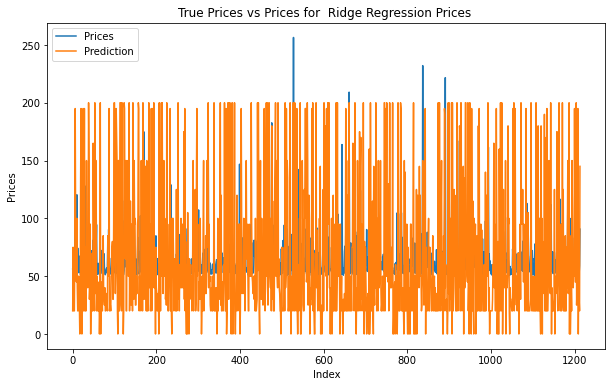

In [41]:
plot_future(y_test, ' Ridge Regression Prices ',y_pred_lat)

# the results are not worth it

# Random Forest Regression

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred_lat=model.predict(X_test)

In [44]:
evaluate_prediction(y_test,y_pred_lat, ' RandomForestRegressor Prices ')

 RandomForestRegressor Prices :
R2 Score : -0.0917
Mean Absolute Error: 46.7657
Root Mean Square Error: 62.6451



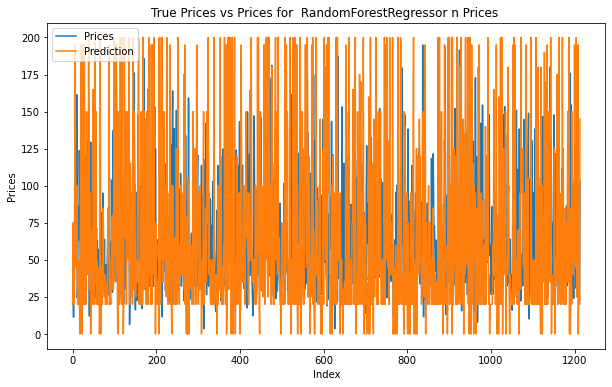

In [45]:
plot_future(y_test, ' RandomForestRegressor n Prices ',y_pred_lat)

# the results are not again worth it

# MLP Regression

In [46]:
from sklearn.neural_network import MLPRegressor

In [47]:
model=MLPRegressor()
model.fit(X_train,y_train)
y_pred_lat=model.predict(X_test)

In [48]:
evaluate_prediction(y_test,y_pred_lat, ' MLPRegressor Prices ')

 MLPRegressor Prices :
R2 Score : 0.0987
Mean Absolute Error: 43.0459
Root Mean Square Error: 56.9197



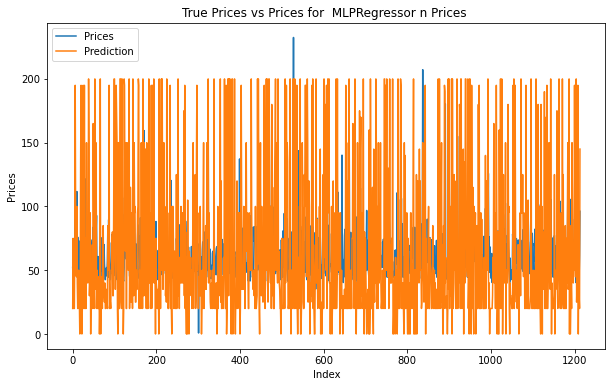

In [49]:
plot_future(y_test, ' MLPRegressor n Prices ',y_pred_lat)

# the results are not improved still

 Linear regression Prices :
R2 Score : 0.0756
Mean Absolute Error: 44.2448
Root Mean Square Error: 57.6469

None


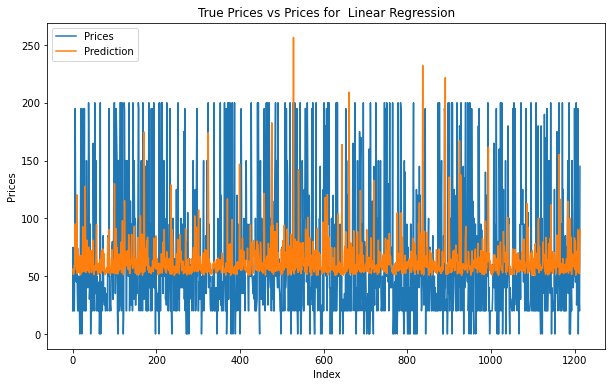

In [50]:
reg=LinearRegression()
reg.fit(X_train,y_train)
pre=reg.predict(X_test)
preLR=pre
print(evaluate_prediction(y_test,preLR, ' Linear regression Prices '))
plot_future(pre, ' Linear Regression', y_test)

## Now we have that udemy courses can't be accurately predictable based on content and lectures. there are more columns that may be needed in future and not included in the dataset

## The reason behind this is the behaviour of Udemy courses totally depends upon the quality and not the quantity

<br> <center> <font size="7" color=Brown>Classification Models for Payment Prediction</font> </center> <br/>
<br> <center> <font size="7" color=Brown>Modeling Evaluation Deployment</font> </center> <br/>

In [51]:
X=df[['num_subscribers','num_reviews','num_lectures','content_duration','subject']]
y=df['is_paid']
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
score_df = pd.DataFrame()
score_df['Scores'] = fs.scores_
score_df['Features'] = X_train.columns
score_df = score_df.sort_values(by = 'Scores')
fig = px.bar(score_df, x='Features', y="Scores",title="Score of Each Attribute",color='Features')
fig.show()

# The above figure shows that payment highly depends upon the number of subscribers

## Working for Models Now

In [52]:
X=df[['num_subscribers','num_lectures']]
y=df['is_paid']

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from sklearn import metrics

# Regression Models and there parameter tuning is done along the way

>1, Training Accuracy: 0.906, Testing Accuracy: 0.936
>2, Training Accuracy: 0.906, Testing Accuracy: 0.936
>3, Training Accuracy: 0.927, Testing Accuracy: 0.933
>4, Training Accuracy: 0.928, Testing Accuracy: 0.933


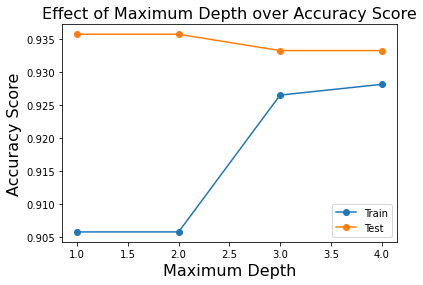

Accuracy of the Decision Tree Classification Model: 93.32784184514004
Confusion atrix of the Decision Tree Classifier

[[  23   55]
 [  26 1110]]
Classification Report of the Model

              precision    recall  f1-score   support

    Not Paid       0.47      0.29      0.36        78
        Paid       0.95      0.98      0.96      1136

    accuracy                           0.93      1214
   macro avg       0.71      0.64      0.66      1214
weighted avg       0.92      0.93      0.93      1214



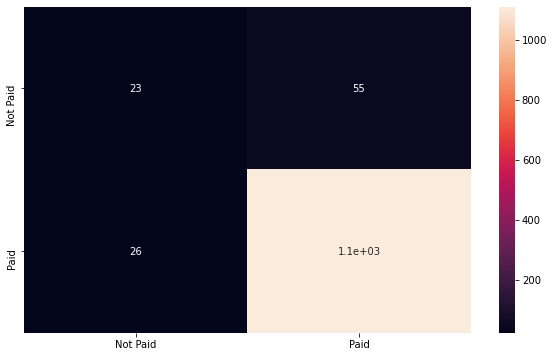

In [54]:
values = [i for i in range(1, 5)]
train_scores = list()
test_scores = list()
for i in values:
    DT_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=i)
    DT_model.fit(X_train, y_train)
    train_yhat = DT_model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = DT_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, Training Accuracy: %.3f, Testing Accuracy: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
plt.xlabel('Maximum Depth',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title("Effect of Maximum Depth over Accuracy Score",fontsize=16)
pyplot.show()
y_train_pred = DT_model.predict(X_train)
DT_model_y_pred = DT_model.predict(X_test)
DT_model_accuracy  = metrics.accuracy_score(y_test, DT_model_y_pred)*100
print("Accuracy of the Decision Tree Classification Model:",DT_model_accuracy)
cm  = confusion_matrix(y_test, DT_model_y_pred)
print("Confusion atrix of the Decision Tree Classifier")
print()
target_names = ['Not Paid', 'Paid']
print(cm)
print("Classification Report of the Model")
print()
print(classification_report(y_test, DT_model_y_pred, target_names=target_names))
cm_df = pd.DataFrame(cm,target_names,target_names)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)
plt.show()

>1, Training Accuracy: 0.906, Testing Accuracy: 0.936
>2, Training Accuracy: 0.906, Testing Accuracy: 0.936
>3, Training Accuracy: 0.929, Testing Accuracy: 0.937
>4, Training Accuracy: 0.931, Testing Accuracy: 0.938
>5, Training Accuracy: 0.939, Testing Accuracy: 0.939


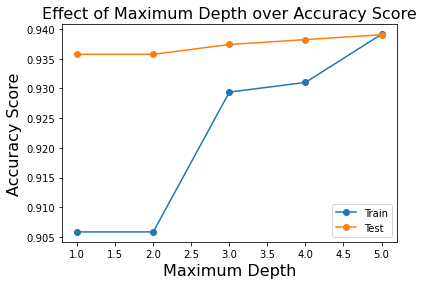

Accuracy of the Random Forest Classifier Model: 93.90444810543657
Confusion Matrix of the Random Forest Classifier

[[  23   55]
 [  26 1110]]
Classification Report of the Model

              precision    recall  f1-score   support

    Not Paid       0.47      0.29      0.36        78
        Paid       0.95      0.98      0.96      1136

    accuracy                           0.93      1214
   macro avg       0.71      0.64      0.66      1214
weighted avg       0.92      0.93      0.93      1214



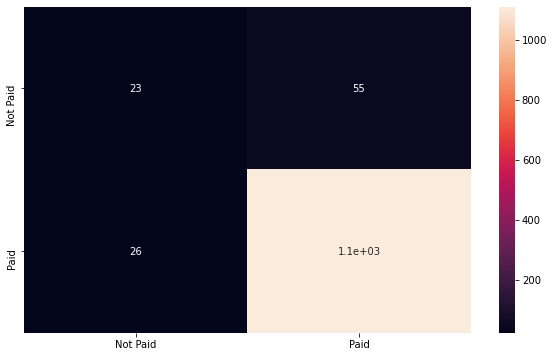

In [55]:
values = [i for i in range(1, 6)]
train_scores = list()
test_scores = list()
for i in values:
    RF_model = RandomForestClassifier(max_features = 'log2',max_depth=i)
    RF_model.fit(X_train, y_train)
    train_yhat = RF_model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = RF_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, Training Accuracy: %.3f, Testing Accuracy: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
plt.xlabel('Maximum Depth',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title("Effect of Maximum Depth over Accuracy Score",fontsize=16)
pyplot.show()
y_train_pred = RF_model.predict(X_train)
RF_model_y_pred = RF_model.predict(X_test)
RF_model_accuracy  = metrics.accuracy_score(y_test, RF_model_y_pred)*100
print("Accuracy of the Random Forest Classifier Model:",RF_model_accuracy)
cm_RF = confusion_matrix(y_test, DT_model_y_pred)
print("Confusion Matrix of the Random Forest Classifier")
print()
target_names = ['Not Paid', 'Paid']
print(cm_RF)
print("Classification Report of the Model")
print()
print(classification_report(y_test, DT_model_y_pred, target_names=target_names))
cm_df = pd.DataFrame(cm_RF,target_names,target_names)                      
plt.figure(figsize=(10,6))
sns.heatmap(cm_df, annot=True)
plt.show()

Accuracy of the Logistic Regression Model: 93.32784184514004
Confusion Matrix of the Logistic Regression Model

[[   9   69]
 [  12 1124]]
Classification Report of the Model

              precision    recall  f1-score   support

    Not Paid       0.43      0.12      0.18        78
        Paid       0.94      0.99      0.97      1136

    accuracy                           0.93      1214
   macro avg       0.69      0.55      0.57      1214
weighted avg       0.91      0.93      0.91      1214



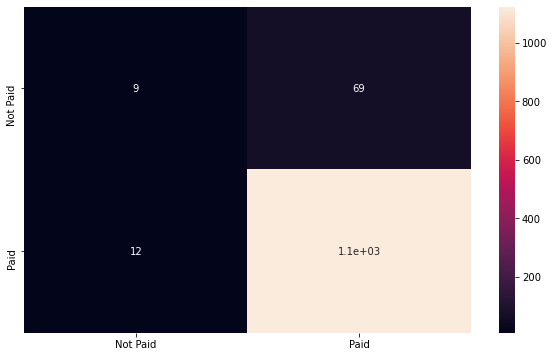

In [56]:
RL_model = LogisticRegression(C = 1, penalty = 'l2')
RL_model.fit(X_train, y_train)
RL_model_y_pred = RL_model.predict(X_test)
RL_model_accuracy  = metrics.accuracy_score(y_test, RL_model_y_pred)*100
print("Accuracy of the Logistic Regression Model:",RL_model_accuracy)
cm_LR = confusion_matrix(y_test, RL_model_y_pred)
print("Confusion Matrix of the Logistic Regression Model")
print()
print(cm_LR)
print("Classification Report of the Model")
print()
print(classification_report(y_test, RL_model_y_pred, target_names=target_names))
cm_df = pd.DataFrame(cm_LR,target_names,target_names)                      
plt.figure(figsize=(10,6))
sns.heatmap(cm_df, annot=True)
plt.show()

## The above 3 algorithms with their parameters tuning shows that it is difficult to proceed with imbalance data, so we will make the data balance and start again

In [57]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)
DT_model = DecisionTreeClassifier()
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
DT_model = DecisionTreeClassifier()
dtree_gscv = GridSearchCV(DT_model, param_grid, cv=3)
dtree_gscv.fit(X_train, y_train)
print("Best Parameters are: ",dtree_gscv.best_params_)

Best Parameters are:  {'criterion': 'gini', 'max_depth': 12}


>1, Training Accuracy: 0.773, Testing Accuracy: 0.757
>2, Training Accuracy: 0.791, Testing Accuracy: 0.778
>3, Training Accuracy: 0.808, Testing Accuracy: 0.772
>4, Training Accuracy: 0.825, Testing Accuracy: 0.793


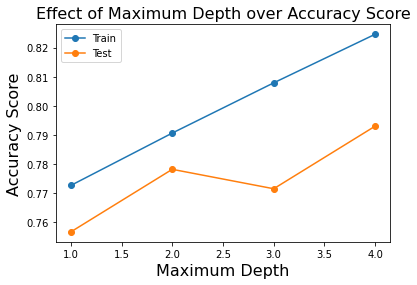

Accuracy of the Decision Tree Classification Model: 79.3026706231454
Confusion atrix of the Decision Tree Classifier

[[531 128]
 [151 538]]
Classification Report of the Model

              precision    recall  f1-score   support

    Not Paid       0.78      0.81      0.79       659
        Paid       0.81      0.78      0.79       689

    accuracy                           0.79      1348
   macro avg       0.79      0.79      0.79      1348
weighted avg       0.79      0.79      0.79      1348



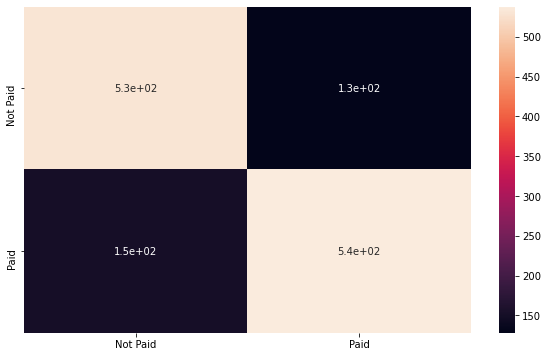

In [60]:
values = [i for i in range(1, 5)]
train_scores = list()
test_scores = list()
for i in values:
    DT_model = DecisionTreeClassifier(criterion = 'gini',max_depth=i)
    DT_model.fit(X_train, y_train)
    train_yhat = DT_model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = DT_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('>%d, Training Accuracy: %.3f, Testing Accuracy: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
plt.xlabel('Maximum Depth',fontsize=16)
plt.ylabel('Accuracy Score',fontsize=16)
plt.title("Effect of Maximum Depth over Accuracy Score",fontsize=16)
pyplot.show()
y_train_pred = DT_model.predict(X_train)
DT_model_y_pred = DT_model.predict(X_test)
DT_model_accuracy  = metrics.accuracy_score(y_test, DT_model_y_pred)*100
print("Accuracy of the Decision Tree Classification Model:",DT_model_accuracy)
cm  = confusion_matrix(y_test, DT_model_y_pred)
print("Confusion atrix of the Decision Tree Classifier")
print()
target_names = ['Not Paid', 'Paid']
print(cm)
print("Classification Report of the Model")
print()
print(classification_report(y_test, DT_model_y_pred, target_names=target_names))
cm_df = pd.DataFrame(cm,target_names,target_names)                      
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)
plt.show()

## The Improvement In decision tree shows that Oversampling is an effective technquie with a better accuracy

# Refrences
- https://machinelearningmastery.com/ridge-regression-with-python/
- https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.pie.html
